In [1]:
import pandas as pd
import os
import random
import statistics
from plotnine import (ggplot,
                      aes,
                     geom_histogram,
                     geom_density,
                     geom_col,
                     theme,
                     element_text)

In [2]:
# Input
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../"))

real_mod_file = os.path.join(
    base_dir,
    "pilot_individual_experiment",
    "data",
   "networks",
    "selected_modules.tsv")

shuffled_mod_file = os.path.join(
    base_dir,
    "pilot_individual_experiment",
    "data",
   "networks",
    "shuffled_selected_modules.tsv")

gene_annot_file = os.path.join(
    base_dir,
    "pilot_individual_experiment",
    "data",
    "annotations",
    "selected_gene_annotations.txt")

In [3]:
# Read data
real_mods = pd.read_table(
    real_mod_file,
    header=0,
    sep='\t',
    index_col=0)

shuffled_mods = pd.read_table(
    shuffled_mod_file,
    header=0,
    sep='\t',
    index_col=0)

gene_annot = pd.read_table(
    gene_annot_file,
    header=0,
    sep='\t',
    index_col=0)

real_mods.head()

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead.
  
/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: read_table is deprecated, use read_csv instead.
  if sys.path[0] == '':
/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: read_table is deprecated, use read_csv instead.


,dynamicColors
PA0001,darkgreen
PA0002,lightcyan
PA0003,yellow
PA0004,purple
PA0005,green


In [4]:
shuffled_mods.head()

,dynamicColors
PA0001,grey
PA0002,grey
PA0003,grey
PA0004,grey
PA0005,grey


In [5]:
gene_annot.head()

,annotation
PAO1_gene_id,
PA0001,core
PA0002,core
PA0003,core
PA0004,core
PA0005,core


### Total number of network modules found

In [6]:
# Total number of modules
uniq_real_mods = real_mods["dynamicColors"].unique()
uniq_shuffled_mods = shuffled_mods["dynamicColors"].unique()

if len(uniq_real_mods) == 1 and uniq_real_mods == "grey":
    tot_real_mods = 0
else:
    tot_real_mods = len(uniq_real_mods)
    
if len(uniq_shuffled_mods) == 1 and uniq_shuffled_mods == "grey":
    tot_shuffled_mods = 0
else:
    tot_shuffled_mods = len(uniq_shuffled_mods)
    
print(tot_real_mods)
print(tot_shuffled_mods)

37
0


### Size of modules

In [7]:
# Number of genes per module
real_mod_groups = real_mods.groupby(["dynamicColors"]).groups

size_real_mods = []
for k,v in real_mod_groups.items():
    size_real_mods.append(len(v))
    
size_real_mods_df = pd.DataFrame(size_real_mods,
                                columns=['num_genes'])

In [8]:
# Median size module
statistics.median(size_real_mods)

78

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


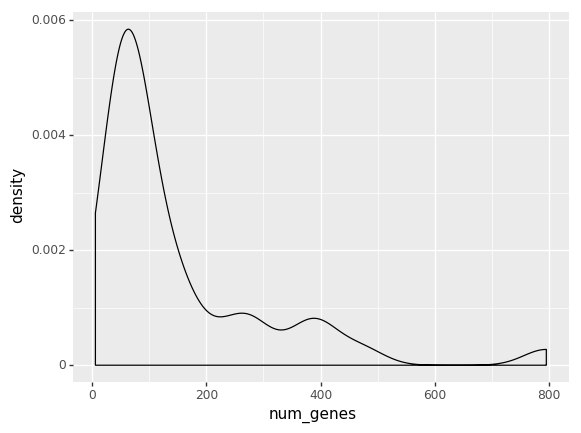

<ggplot: (8736620610649)>

In [9]:
# Distribution of module sizes
g = ggplot(size_real_mods_df, aes(x="num_genes"))
g += geom_density()
g

### Modules with both core and accessory gene interactions

In [10]:
# For each module determine if there are any with both core and accessory genes
mods_with_core_and_acc = []
for k,v in real_mod_groups.items():
    mod_gene_annotations = gene_annot.loc[list(v)]['annotation'].unique()
    if len(mod_gene_annotations) > 1:
        mods_with_core_and_acc.append(k)
print(len(mods_with_core_and_acc))
print(mods_with_core_and_acc)

25
['black', 'blue', 'brown', 'cyan', 'darkorange', 'darkturquoise', 'green', 'greenyellow', 'grey', 'grey60', 'lightcyan', 'lightgreen', 'lightyellow', 'magenta', 'midnightblue', 'orange', 'pink', 'purple', 'red', 'salmon', 'skyblue', 'tan', 'turquoise', 'white', 'yellow']


In [11]:
# Merge annotation and module information per gene
gene_annot_mods = gene_annot.merge(real_mods, left_index=True, right_index=True)

gene_annot_mods.head()

,annotation,dynamicColors
PAO1_gene_id,,
PA0001,core,darkgreen
PA0002,core,lightcyan
PA0003,core,yellow
PA0004,core,purple
PA0005,core,green


In [12]:
# Create df 
mod_names = []
core_acc_names = []
val = []
for k,v in real_mod_groups.items():
    for gene_cat in ["core", "accessory"]:
        mod_names.append(k)
        core_acc_names.append(gene_cat)
        lst_gene_annotations = list(gene_annot.loc[list(v)]['annotation'])
        val.append(lst_gene_annotations.count(gene_cat))

In [13]:
df = pd.DataFrame(data = list(zip(mod_names, core_acc_names, val)),
                  columns=["modules", "gene annot", "value"])

df.head()

,modules,gene annot,value
0,black,core,262
1,black,accessory,6
2,blue,core,467
3,blue,accessory,6
4,brown,core,403


In [14]:
# Modules with only core genes
df[df['value'] == 0]

,modules,gene annot,value
9,darkgreen,accessory,0
11,darkgrey,accessory,0
13,darkmagenta,accessory,0
15,darkolivegreen,accessory,0
19,darkred,accessory,0
43,paleturquoise,accessory,0
51,royalblue,accessory,0
53,saddlebrown,accessory,0
57,sienna3,accessory,0
61,steelblue,accessory,0


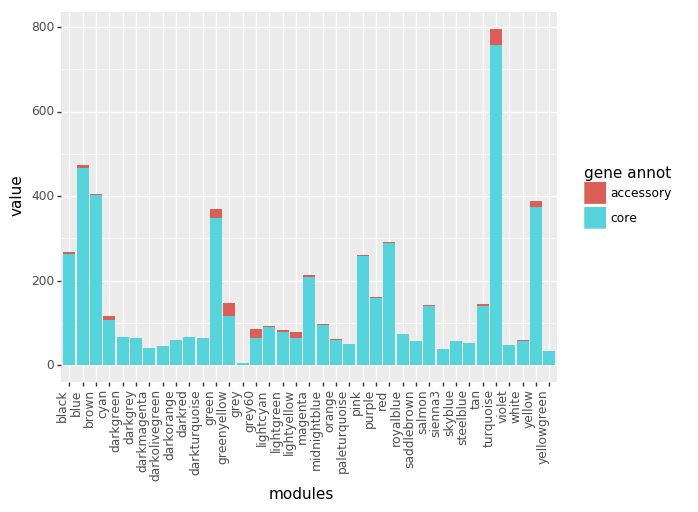

<ggplot: (8736620571245)>

In [15]:
(ggplot(df, aes(x='modules', y='value', fill='gene annot'))
 + geom_col()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
)

In [16]:
# Next questions to ask
# Pick modules with only core
# Pick modules with mixed core and accessory
# What types of genes are in these two modules?
# Enrichment of operons, pathways, can we get a set of operons/pathways known to have both core and accessory? 

### Manually explore genes in modules

Cherrry pick core-only module and core-accessory module and search for literature about what is known about genes

In [21]:
# Gene number to gene name file
gene_name_file = os.path.join(
    base_dir,
    "pilot_individual_experiment",
    "data",
    "annotations",
    "Pseudomonas_aeruginosa_PAO1_107.csv")

In [22]:
# Read gene number to name mapping
gene_name_mapping = pd.read_table(
    gene_name_file,
    header=0,
    sep=',',
    index_col=0)

gene_name_mapping = gene_name_mapping[["Locus Tag", "Name"]]

gene_name_mapping.set_index("Locus Tag", inplace=True)
gene_name_mapping.head()

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead.
  


,Name
Locus Tag,
"PA0001""",dnaA
"PA0002""",dnaN
"PA0003""",recF
"PA0004""",gyrB
"PA0005""",lptA


In [23]:
# Format gene numbers to remove extraneous quotes
gene_number = gene_name_mapping.index
gene_name_mapping.index = gene_number.str.strip("\"")

gene_name_mapping.head()

,Name
Locus Tag,
PA0001,dnaA
PA0002,dnaN
PA0003,recF
PA0004,gyrB
PA0005,lptA


In [24]:
# Map gene numbers to names
def get_gene_names(gene_id_list):    
    gene_names = []
    for gene_id in gene_id_list:
        gene_name = gene_name_mapping.loc[gene_id]
        if gene_name.isnull()[0]:
            # If gene name does not exist
            # Use gene number
            gene_names.append(gene_id)
        else:
            gene_names.append(gene_name[0])
    return gene_names

In [43]:
# Select core-only module
#core_only_gene_ids = list(real_mod_groups['darkgreen'])
core_only_gene_ids = list(real_mod_groups['yellowgreen'])

core_only_annot = gene_annot.loc[core_only_gene_ids]['annotation']
core_only_gene_names = get_gene_names(core_only_gene_ids)

core_only_df = pd.DataFrame(data = list(zip(core_only_gene_names, core_only_annot)),
                           columns=["gene names", "annot"],
                          index = core_only_gene_ids)

core_only_df.head(100)

,gene names,annot
PA0581,PA0581,core
PA0582,folB,core
PA0583,PA0583,core
PA0843,plcR,core
PA0844,plcH,core
PA1062,PA1062,core
PA1411,PA1411,core
PA1779,PA1779,core
PA2464,PA2464,core
PA2761,PA2761,core


In [40]:
# Select core-oacc module
core_acc_gene_ids = list(real_mod_groups['grey60'])
#core_acc_gene_ids = list(real_mod_groups['lightyellow'])

core_acc_annot = gene_annot.loc[core_acc_gene_ids]['annotation']
core_acc_gene_names = get_gene_names(core_acc_gene_ids)

core_acc_df = pd.DataFrame(data = list(zip(core_acc_gene_names, core_acc_annot)),
                           columns=["gene names", "annot"],
                          index = core_acc_gene_ids)

core_acc_df.head(30)

,gene names,annot
PA0050,PA0050,core
PA0077,icmF1,core
PA0086,tagJ1,core
PA0092,tsi6,core
PA0093,tse6,core
PA0382,micA,core
PA0445,PA0445,accessory
PA0523,norC,core
PA0644,PA0644,accessory
PA0918,PA0918,core
